# Import Library

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Dataset

In [33]:
tlkm = pd.read_csv('TLKM.JK.csv')
tlkm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-06-18,1500.0,1580.0,1500.0,1500.0,1010.759155,96255000
1,2012-06-19,1520.0,1540.0,1510.0,1520.0,1024.235962,58010000
2,2012-06-20,1600.0,1620.0,1540.0,1600.0,1078.143066,117700000
3,2012-06-21,1570.0,1610.0,1570.0,1570.0,1057.927979,72670000
4,2012-06-22,1550.0,1580.0,1550.0,1550.0,1044.451050,58017500


# Data Understanding

Cek deskripsi statistik data menggunakan fungsi info()

In [34]:
tlkm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2007 non-null   object 
 1   Open       2007 non-null   float64
 2   High       2007 non-null   float64
 3   Low        2007 non-null   float64
 4   Close      2007 non-null   float64
 5   Adj Close  2007 non-null   float64
 6   Volume     2007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.9+ KB


Cek deskripsi statistik data menggunakan fungsi describe()

In [35]:
tlkm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2.007000e+03
mean,3265.483807,3301.671649,3231.258097,3266.033881,2905.905497,9.127892e+07
std,840.620771,844.255726,836.493804,840.844861,936.623214,5.160720e+07
min,1500.000000,1540.000000,1500.000000,1500.000000,1010.759155,0.000000e+00
25%,2580.000000,2625.000000,2545.000000,2600.000000,2236.330566,5.940875e+07
50%,3385.000000,3420.000000,3350.000000,3385.000000,3111.571533,8.265250e+07
75%,3970.000000,4000.000000,3935.000000,3970.000000,3702.148194,1.106220e+08
max,4800.000000,4840.000000,4780.000000,4800.000000,4465.643555,3.797257e+08


Cek jumlah baris dan kolom

In [36]:
tlkm.shape

(2007, 7)

Mengubah kolom Adj Close menjadi Adj_Close

In [37]:
tlkm.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

Cek nilai yang hilang

In [38]:
tlkm.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

Periksa nilai nol di dataset

In [39]:
print("Jumlah nilai 0 dalam kolom Open:", (tlkm.Open == 0).sum())
print("Jumlah nilai 0 dalam kolom High:", (tlkm.High == 0).sum())
print("Jumlah nilai 0 dalam kolom Low:", (tlkm.Low == 0).sum())
print("Jumlah nilai 0 dalam kolom Close:", (tlkm.Close == 0).sum())
print("Jumlah nilai 0 dalam kolom Adj Close:", (tlkm.Adj_Close == 0).sum())
print("Jumlah nilai 0 dalam kolom Volume:", (tlkm.Volume == 0).sum())

Jumlah nilai 0 dalam kolom Open: 0
Jumlah nilai 0 dalam kolom High: 0
Jumlah nilai 0 dalam kolom Low: 0
Jumlah nilai 0 dalam kolom Close: 0
Jumlah nilai 0 dalam kolom Adj Close: 0
Jumlah nilai 0 dalam kolom Volume: 71


Hapus nilai nol di dataset pada kolom Volume

In [40]:
tlkm = tlkm[tlkm.Volume != 0]

Cek ulang jumlah baris dan kolom terbaru

In [41]:
tlkm.shape

(1936, 7)

Cek outliers pada kolom Open

<Axes: xlabel='Open'>

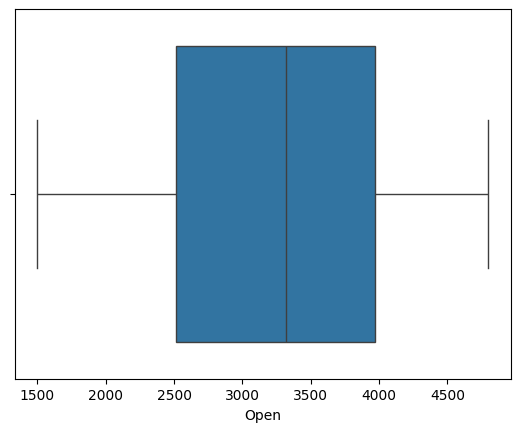

In [42]:
sns.boxplot(x=tlkm['Open'])

Cek outliers pada kolom High

<Axes: xlabel='High'>

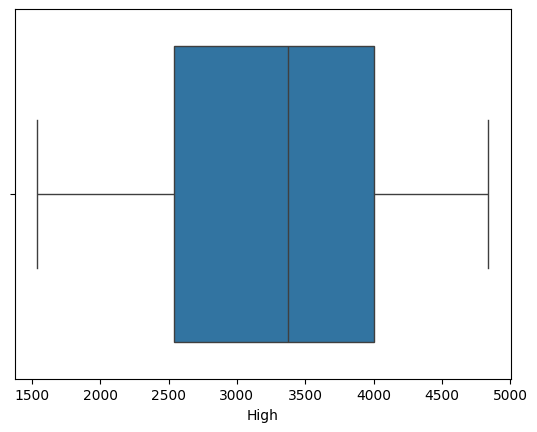

In [43]:
sns.boxplot(x=tlkm['High'])

Cek outliers pada kolom Low

<Axes: xlabel='Low'>

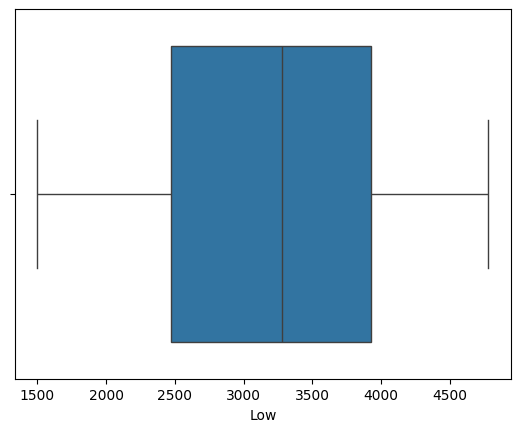

In [44]:
sns.boxplot(x=tlkm['Low'])

Cek outliers pada kolom Volume

<Axes: xlabel='Volume'>

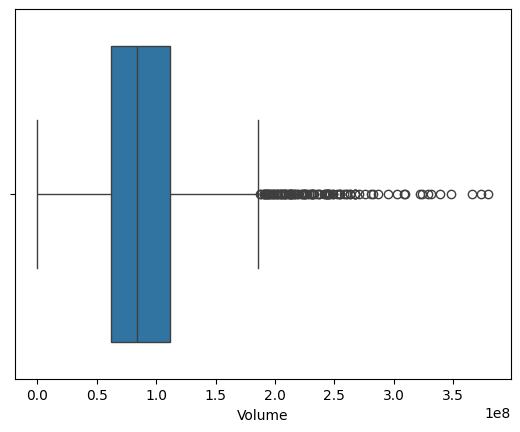

In [45]:
sns.boxplot(x=tlkm['Volume'])

Cek skewness pada data

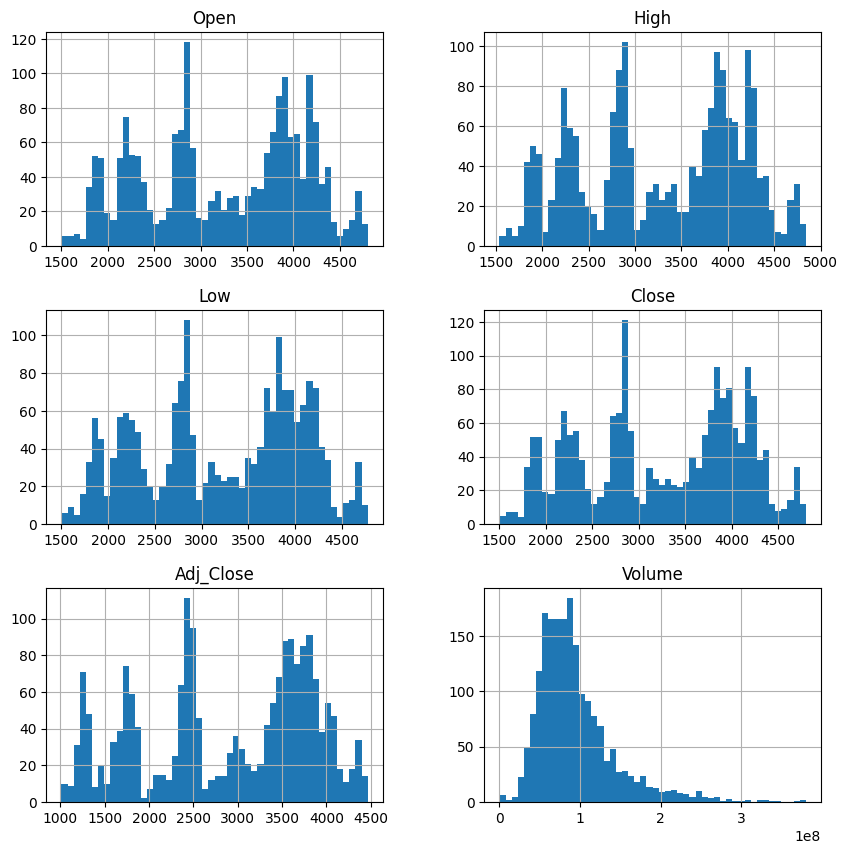

In [46]:
tlkm.hist(bins=50, figsize=(10, 10))
plt.show()

Cek korelasi data menggunakan pairplot

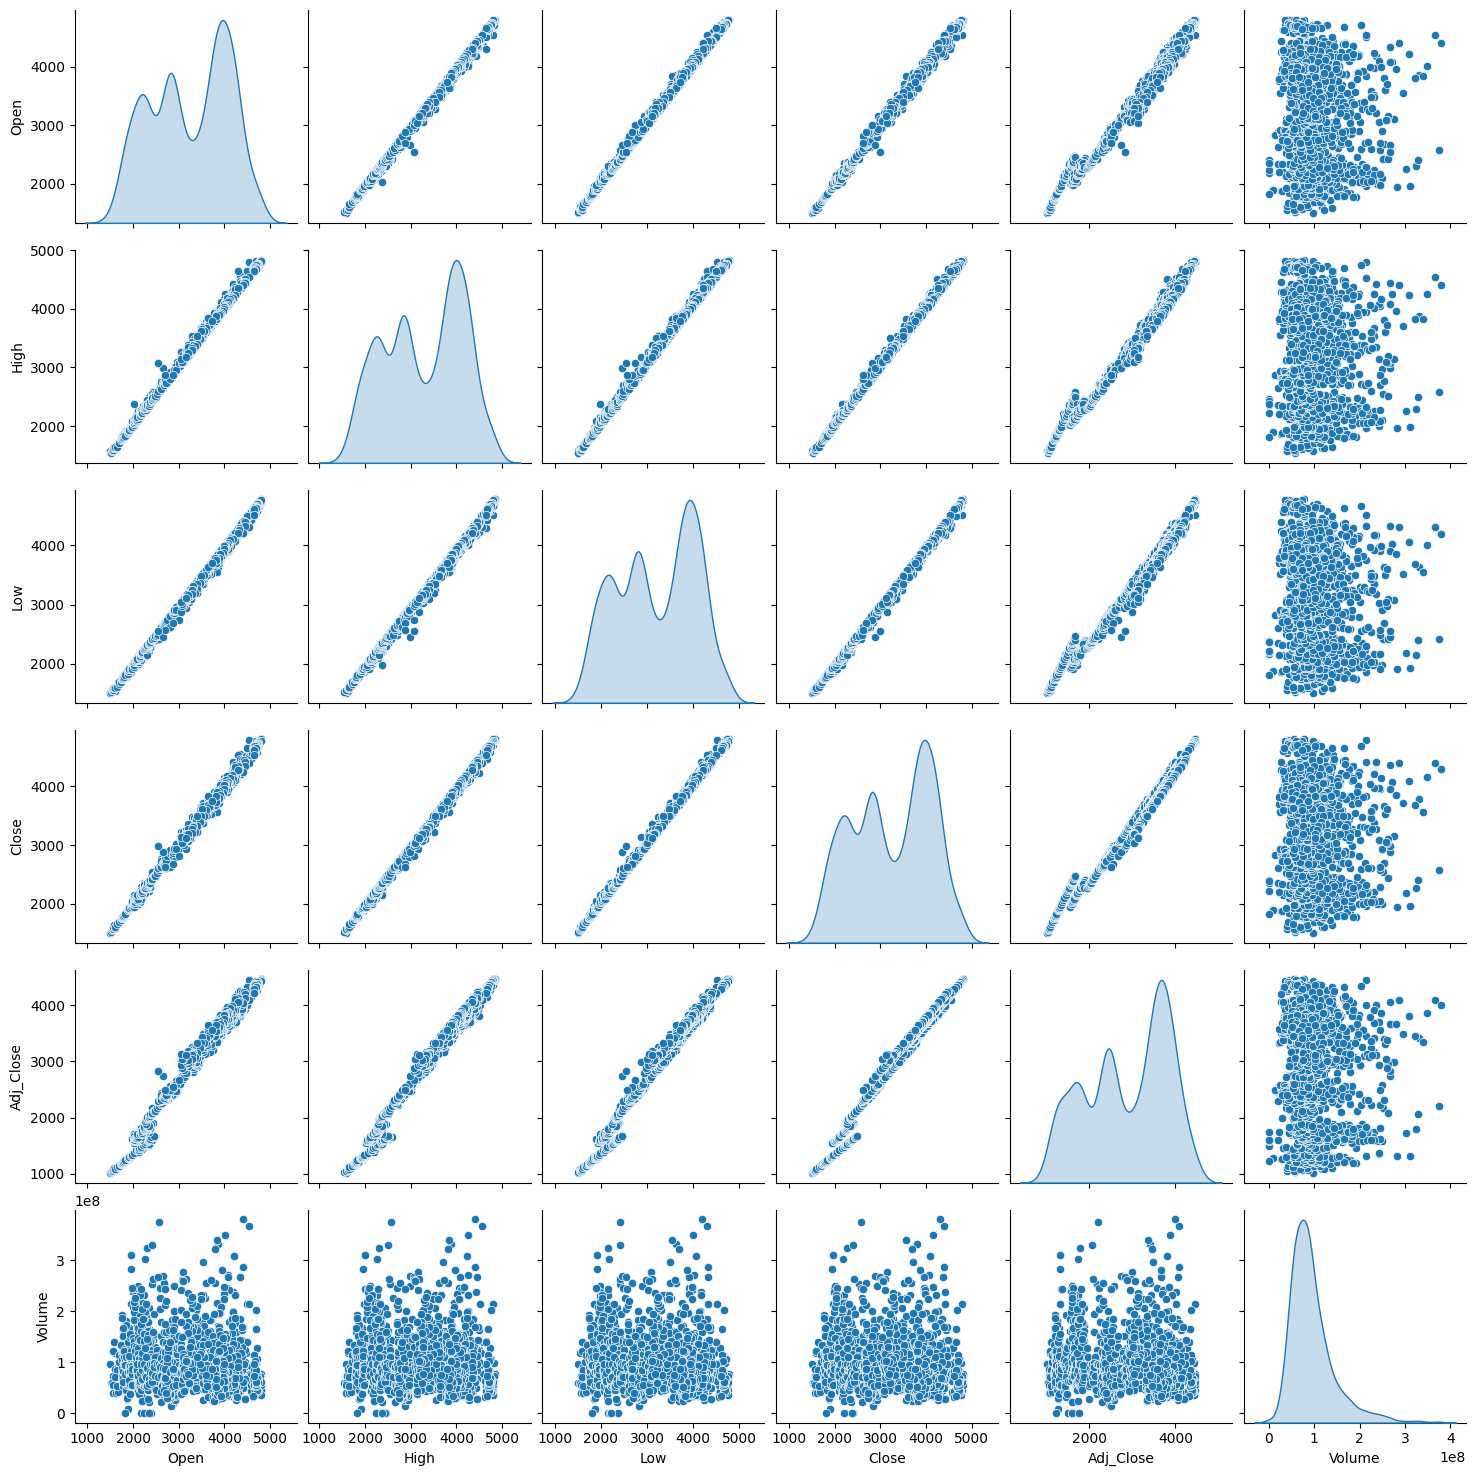

In [47]:
sns.pairplot(tlkm, diag_kind='kde')

Cek korelasi data menggunakan heatmap

Text(0.5, 1.0, 'Correlation Matrix')

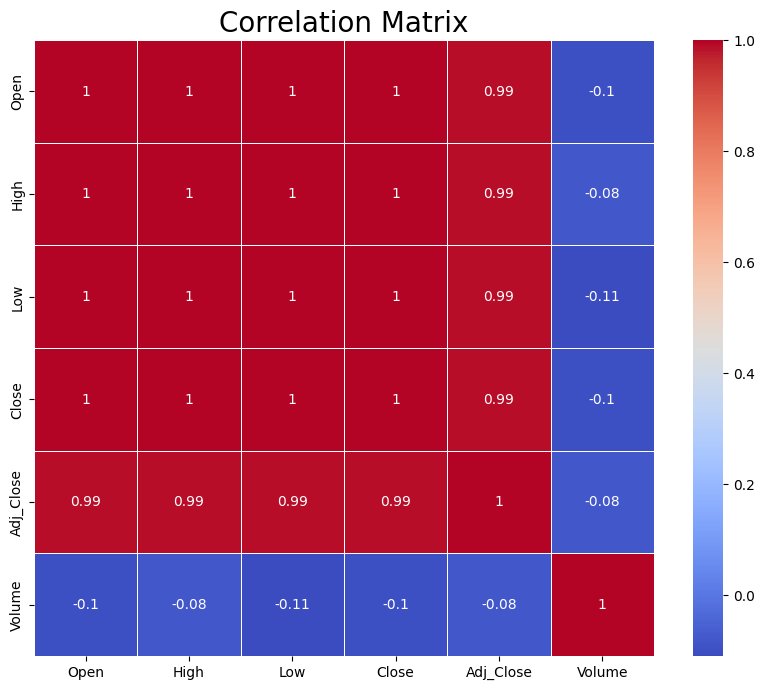

In [48]:
plt.figure(figsize=(10, 8))
correlation_matrix = tlkm.corr(numeric_only=True).round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

Hapus kolom Volume dan Adj_Close

In [49]:
tlkm.drop(['Volume', 'Adj_Close'], axis=1, inplace=True)
tlkm.head()

,Date,Open,High,Low,Close
0,2012-06-18,1500.0,1580.0,1500.0,1500.0
1,2012-06-19,1520.0,1540.0,1510.0,1520.0
2,2012-06-20,1600.0,1620.0,1540.0,1600.0
3,2012-06-21,1570.0,1610.0,1570.0,1570.0
4,2012-06-22,1550.0,1580.0,1550.0,1550.0


# Data Preparation

Cek korelasi data menggunakan pairplot pada fitur Open, High, dan Low

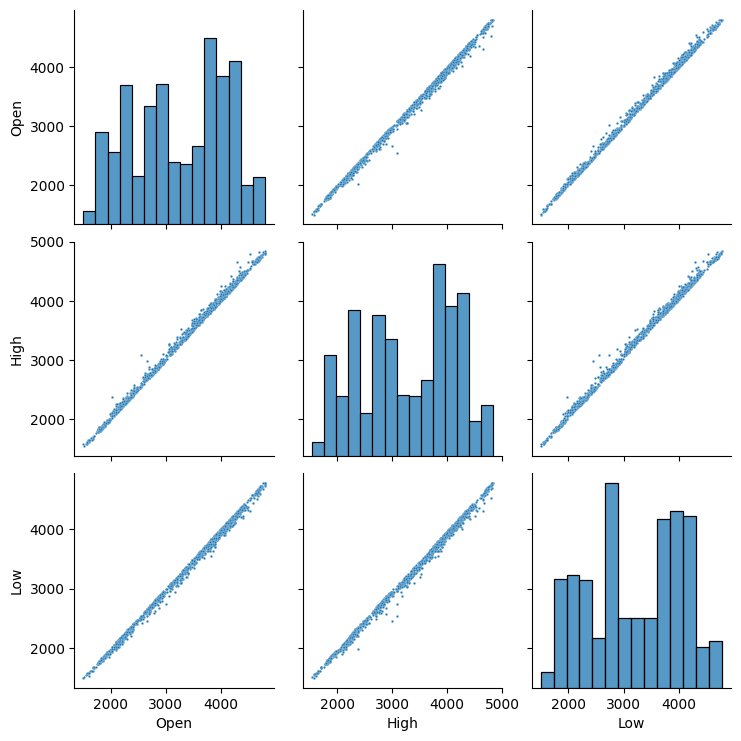

In [50]:
sns.pairplot(tlkm[['Open', 'High', 'Low']], plot_kws={'s':3})

Sederhanakan fitur dengan PCA

In [51]:
pca = PCA(n_components=3, random_state=42)
pca.fit(tlkm[['Open', 'High', 'Low']])
principalComponents = pca.transform(tlkm[['Open', 'High', 'Low']])

Setelah menerapkan class PCA, cek proporsi informasi dari ketiga komponen PCs tersebut

In [52]:
pca.explained_variance_ratio_.round(3)

array([0.999, 0.   , 0.   ])

Gunakan komponen PCA pertama, buat kolom baru dengan hasil PCA, dan hapus kolom Open, High, dan Low

In [53]:
pca = PCA(n_components=1, random_state=42)
pca.fit(tlkm[['Open', 'High', 'Low']])
tlkm['pca'] = pca.transform(tlkm.loc[:, ('Open', 'High', 'Low')]).flatten()
tlkm.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

Split data menjadi data Train dan Test

In [54]:
X = tlkm.drop(['Close', 'Date'], axis=1)
y = tlkm['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling data menggunakan StandardScaler

In [55]:
scaler = StandardScaler()
X_train['pca'] = scaler.fit_transform(X_train)

# Modeling

In [56]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression', 'KNearestNeighbor', 'RandomForest', 'AdaptiveBoosting'])

Linear Regression

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=lr.predict(X_train), y_true=y_train)

K-Nearest Neighbor

In [58]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

models.loc['train_mse','KNearestNeighbor'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

# Model Evaluation

Scaling data Test terhadap fitur numerik pada X_test

In [59]:
X_test['pca'] = scaler.fit_transform(X_test)

Evaluasi model dengan metrik MSE

In [60]:
mse = pd.DataFrame(index=['train', 'test'], columns=['LinearRegression', 'KNearestNeighbor'])

model_dict = {'LinearRegression': lr, 'KNearestNeighbor': knn}

for model_name, model in model_dict.items():
    mse.loc['train', model_name] = mean_squared_error(y_pred=model.predict(X_train), y_true=y_train)/1e3
    mse.loc['test', model_name] = mean_squared_error(y_pred=model.predict(X_test), y_true=y_test)/1e3

mse

,LinearRegression,KNearestNeighbor
train,1.079713,0.874396
test,1.931166,2.254899


Plot metrik MSE dengan bar

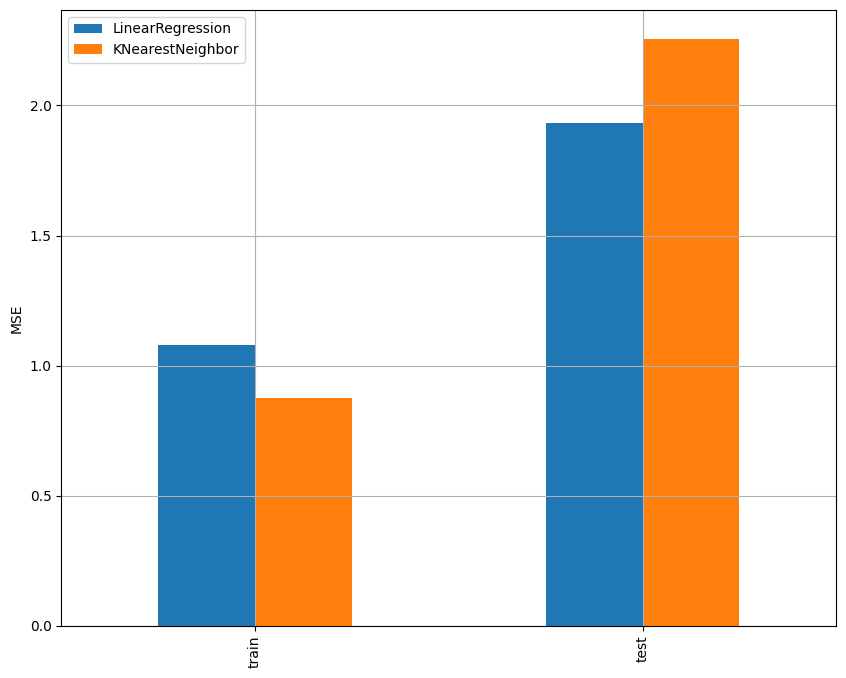

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))
mse.plot(kind='bar', ax=ax)
ax.set_ylabel('MSE')
ax.grid(zorder=0)

Untuk mengujinya, buat prediksi menggunakan beberapa harga dari data test

In [62]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LinearRegression,prediksi_KNearestNeighbor
585,2715.0,2683.4,2668.0
905,3340.0,3324.8,3322.0
913,3380.0,3392.0,3393.0
1824,4110.0,4154.7,4164.0
1514,3910.0,3879.6,3882.0
